# Health and Wealth 

A tool for the analysing patterns between income inequality and health for European countries.

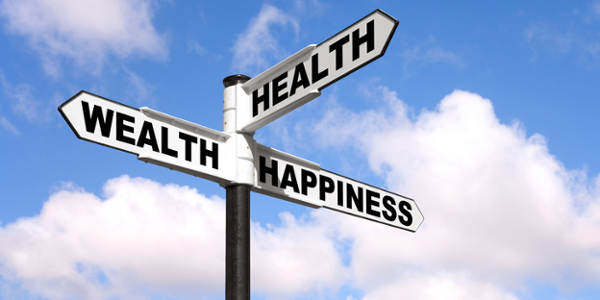

In [1]:
from IPython.core.display import Image 
Image('wealth_health.png')

## 1. Introduction

In 2015 all United Nation member states agreed on the 2030 Agenda for Sustainable Development. It consists of  17 Sustainable Development Goals. These goals should lead to peace and prosperity for people and the planet. Goal 3 on the list is ‘Ensure healthy lives and promote well-being for all at all ages’ (United Nations, 2018).<BR>
    
The link between income and health seems undisputed. People with better health are more likely to be rich and poverty goes hand in hand with poor health (The Economist, 2008).  However not only income plays a role,  income inequality is even more important. High levels of inequality negatively affect the health of the whole population, no matter your individual status. Inequality reduces social cohesion, which leads to  insecurity, fear and stress for everyone (Institute for Policy Studies, 2018). <BR>
    
This will lead to the following research question:

**In what way does income inequality affect health in Europe?**

To answer this question three sub-questions will be reviewed:
1. To which degree do countries experience income inequality? 
2. Which health aspects are mostly affected by income inequality? 
3. Which aspects of wealth within a country affect income inequality?

The aim of this report is to get better understanding about these relationships. Based on these questions, policy implementations will be recommended. <BR>

The structure of this report is as follows. In chapter 2 an literature overview is provided. In chapter 3 the methodology is discussed. The data is addressed in chapter 4, which include importing, cleaning, analyzing the data, and discussing the results. In chapter 5 a conclusion and policy recommendations are provided. 

## 2. Literature 

It is widely accepted that individual poverty increases mortality in a society (Subramanian & Kawachi, 2004). This relationship goes both ways, meaning that someone in bad health is more prone to experience poverty as well. However, the relationship between income inequality and populations health remains controversial (Wilkinson & Pickett, 2006). It is important to notice here the difference between individual wealth, in other words the individual income of one person, and income inequality, the unequal distribution of individual income within a society. Most studies on this topic acknowledge a causal connection between income inequality and health (Pickett & Wilkinson, 2015). These studies suggest that a greater income inequality leads to more diseases and a higher mortality rate within the part of society with a lower income. One could imagine that the relationship between income inequality and health is less straightforward than the relationship between individual poverty and health (Lynch, et al., 2000). This raises the question what exactly fuels this relationship between income inequality and health.<BR>
    
There are different interpretations about the association between income inequality and health (Lynch, et al., 2000). Firstly, individual income is likely to play a part in this relationship. People with lower income simply have less access to health care. However, income inequality can also occur in societies where people with low income are theoretically still able to afford health care, and where health still seems to be worse in this bottom part of society (inequality.org, 2018). This suggest there are other factors in play. Another cause for this relationship therefore lies in the psychosocial environment (Lynch, et al., 2000). This means that the relationship is more likely to be related to stress. Income inequality leads to decreased social cohesion, due to the accentuating of social class or status (Pickett & Wilkinson, 2015). This can also come together with increased shame about status, and more distrust among a society, which all act as a social stressor (Lynch, et al., 2000). Overall, income inequality can often be linked to mental health issues (Institute for policy studies, 2018).

How to tackle income inequality is not clear cut. An often used strategy is to implement a progressive tax system. However, research has shown this does not effectively reduce income inequality (Tax Policy Center, 2018). 



## 3. Methodology

To answer the research question, regression analysis will be used. This type of analysis is often used to estimate relationships between certain variables. 

First, the countries will be evaluated considering the GINI rate. Next, the correlations between income inequality and the health indicators will be calculated. Some wealth indicators will also be investigated, to get more insight about how income ineqaulity can be affected by these indicators. In general, there is not a clear cause to income inequality, which makes it interesting to look into these wealth indicators.

The indicators that have a moderate correlation or higher (> 0.3 or < - 0.3) with income inequality will be used for the regression analysis (Wilson, 2009). However the user can also choose for another correlation value. <BR> 
   
These correlations will be visualized by creating a heat map, which shows the correlations categorized by colour. The correlation indicates the strength and direction of the relationship between the indicators.  A correlation of 1 means a perfect positive correlation, so if one indicator increase, the other indicator will do so. A correlation of -1 means that if one indicator increase, the other one decreases.The next step is to selected indicators that one want to investigate further.These indicators will be plotted using a scatter plot.

The whole process is described in the figure below. 


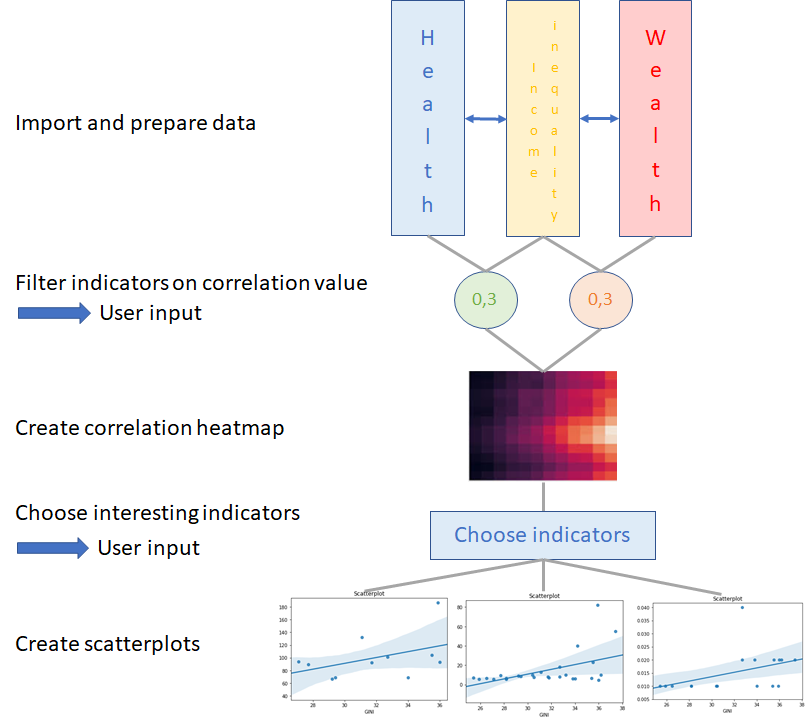

In [2]:
Image('Report diagram.png')

## 4. Data

The Gini coefficient is a measure of equality in a certain situation. It is most often used to define income inequality. The Gini coefficient is a number between zero and one (Investopedia, 2018). Zero means everyone in the society has the same income level. One means one person possesses the whole amount of income, and everyone else has nothing. In this research, the gini factor will be expressed as a rate. The GINI coefficient will be derived from the World Bank.

Health indicators are already categorized by the World Bank in the Health database. Unfortunately, the World Bank does not categorize wealth indicators that well. However, it is still interesting to look into such indicators, since they might give insight in how income inequality can be influenced. For this reason, indicators related to transfer payments were selected. The databanks “Public Sector” and “Private Sector and Trade” were expected to contain indicators for transfer payments.The selected indicators were kept relatively broad as there was no access to an expert on what is deemed a transfer payment or not. This resulted in a extensive list of wealth gap indicators. 



### Set up
First all the relevant packages used to analyse the data are imported. 

In [3]:
#import all packages 
import wbdata # Used for collecting data from world bank
import datetime # Used to set date for wbdatetime
import pandas as pd # For the general purpose of data
import matplotlib.pyplot as plt # For scatterplots 
import seaborn as sns # For heat map 

Here the global variables are defined. <BR>
Also the size of the panda dataframe is set to 500 x 500, so all the rows and columns can be inspected. 

In [4]:
global health, GINI, GINI_Health, corr_GINI, business, businsess_GINI_corr, Corr_GINI_wealth_Selected, GINI_Health, Corr_GINI_Selected, businsess_GINI, output_for_heat_map

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Collecting data
The next step to import all the data. For this the collect_data funcation is used. The user can input the year of which he or she wants to see the data. In this report there is chosen for the year 2015.


In [5]:
def collect_data():
    
    '''This function collects world bank indicator codes from the Health.csv file. It passes this to a dictionary,
    takes the values of these and passes to wbdata.get_dataframe(). It ask the user to input the year they would 
    like to analyse and input this to wbdata.get_dataframe() as a integer and wbdata.get_dataframe() collects data
    for all the health indicators in Health.csv for the inputted year. The GINI coefficient is collected also collected
    using wbdata.get_dataframe()'''
    
    global GINI, health, business
    
    # import health indicators and transform it into dictionary. This is necessary to use the wb data. 
    raw_data_health = pd.read_csv("Health.csv")
    data_health_dict =dict(raw_data_health.values)
    
    # import wealth indicators and transform it into dictionary
    raw_data_wealth = pd.read_csv("Business.csv")
    data_business_dict = dict(raw_data_wealth.values)
    
    # user can input the year of which he want to analyse the data
    year = input("What year would you like to analyse? ")
    year =int(year)
    
    # importing the data using wb data 
    data_date = (datetime.datetime(year,1,1), datetime.datetime(year,1,1))
    
    # health indicators 
    health = wbdata.get_dataframe(data_health_dict,
                              country=('BE','BG','CZ','DK','DE','EE','IE','GR','ES','FR','HR','IT','CY','LV','LT','LU',
                                     'HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','GBR'), 
                            data_date=data_date, 
                            convert_date=False, keep_levels=True)
    
    #GINI rate, imported directly from the web using 'SI.POV.GINI'
    GINI = wbdata.get_dataframe({'SI.POV.GINI':'GINI'}, 
                            country=('BE','BG','CZ','DK','DE','EE','IE','GR','ES','FR','HR','IT','CY','LV','LT','LU',
                                     'HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','GBR'), 
                            data_date=data_date, 
                            convert_date=False, keep_levels=True)
    
    # wealth indicators 
    business = wbdata.get_dataframe(data_business_dict, 
                            country=('BE','BG','CZ','DK','DE','EE','IE','GR','ES','FR','HR','IT','CY','LV','LT','LU',
                                     'HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','GBR'), 
                            data_date=data_date, 
                            convert_date=False, keep_levels=True)

In [6]:
collect_data()

What year would you like to analyse? 2015


**To which degree do countries experience income inequality?**<BR>
Here, the GINI rate per country will be evaluated. First, the countries which do not contain any data will be dropped. Next, by using a bar chart, the first research question will be answered. 

In [7]:
GINI

,,GINI
country,date,
Austria,2015,30.5
Belgium,2015,27.7
Bulgaria,2015,NaN
Cyprus,2015,34.0
Czech Republic,2015,25.9
Germany,2015,31.7
Denmark,2015,28.2
Spain,2015,36.2
Estonia,2015,32.7


In [8]:
# Remove countries with NA values
GINI = GINI.dropna()

In [9]:
def GINI_per_country():
    """This function plots a bar chart of the countries and their GINI rate"""
    global GINI
    GINI = GINI.sort_values("GINI")
    x = GINI.index
    GINI_rate = GINI.GINI
    x_pos = [i for i, _ in enumerate(x)]


    plt.figure(figsize = (60,10))
    plt.bar(x_pos, GINI_rate)


    plt.xlabel("Countries, year")
    plt.ylabel("GINI rate")
    plt.title("GINI rate per country")
    plt.xticks(x_pos, x)
    plt.show()

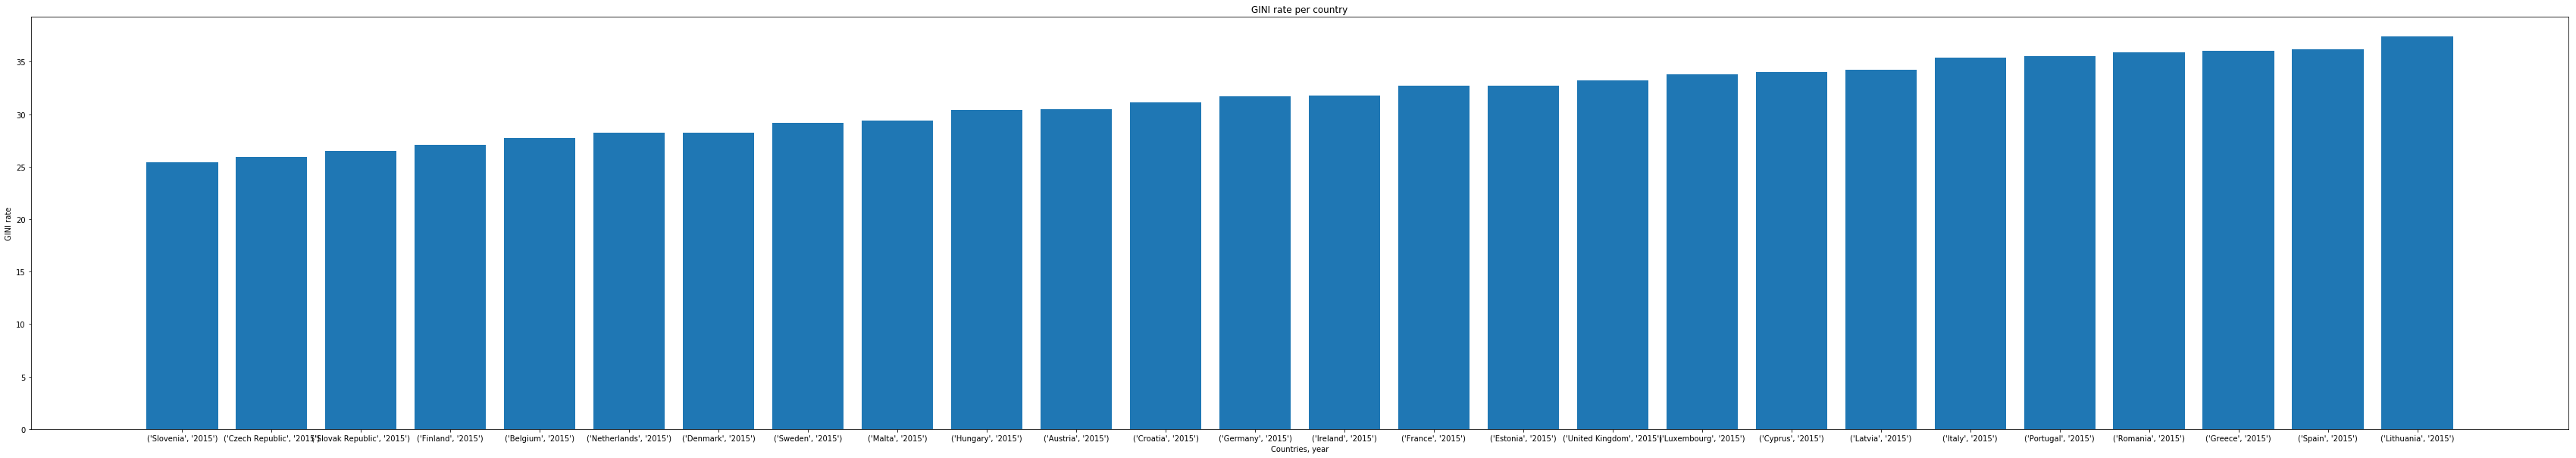

In [10]:
GINI_per_country()

In [11]:
print('The minimum GINI rate is', GINI.GINI.min())
print('The maximum GINI rate is', GINI.GINI.max())
print('The average GINI rate is',GINI.GINI.mean())

The minimum GINI rate is 25.4
The maximum GINI rate is 37.4
The average GINI rate is 31.542307692307688


As the bar chart shows, the average GINI rate is about 31.5, with Slovenia having the lowest income inequality, and Lithuania the highest. Overall, the income inequality rate in Europe is quite low.  

### Preparing data
In this section the health indicator dataframe is merged with the GINI dataframe. 

In [12]:
def prepare_health_data():
    
    '''This function combines the GINI pandas data frame and the health pandas data frame. All of the inputs to the 
    data frame are then correlated together. Since the analysis considers the relationship between health and and the 
    GINI coefficent (wealth gap) the corelation between health indicators is removed leaving just the correlation
    between GINI and health indicators.'''
    
    global corr_GINI_Health, health, GINI_Health
    
    GINI_Health = pd.concat([GINI,health],axis = 1)
    
    corr = GINI_Health.corr() 
    
    # Non relevant indicators are dropped here 
    corr_pop_removed = corr.drop(['Population, female (% of total)',
                                        'Population ages 75-79, female (% of female population)',
                                       'Population ages 45-49, female (% of female population)',
                                       'Population ages 40-44, female (% of female population)',
                                       'Population ages 80 and above, male (% of male population)',
                                       'Population ages 45-49, male (% of male population)',
                                       'Population ages 75-79, male (% of male population)',
                                       'Population ages 80 and above, female (% of female population)',
                                       'Population ages 40-44, male (% of male population)',
                                       'Population, total',
                                       'Population ages 50-54, female (% of female population)',
                                       'Population ages 65 and above (% of total)',
                                       'Population ages 50-54, male (% of male population)',
                                       'Age dependency ratio, old (% of working-age population)',
                                       'Population ages 10-14, male (% of male population)',
                                       'Population ages 15-19, male (% of male population)',
                                       'Population ages 55-59, female (% of female population)',
                                       'Age dependency ratio (% of working-age population)',
                                       'Population ages 35-39, female (% of female population)',
                                       'Population ages 15-64 (% of total)',
                                       'Population ages 70-74, female (% of female population)',
                                       'Population ages 35-39, male (% of male population)',
                                       'Population ages 25-29, male (% of male population)',
                                       'Population ages 15-19, female (% of female population)',
                                       'Population ages 20-24, male (% of male population)',
                                       'Population ages 5-9, male (% of male population)',
                                       'Population ages 55-59, male (% of male population)',
                                       'Population ages 10-14, female (% of female population)',
                                       'Population ages 30-34, male (% of male population)',
                                       'Population ages 30-34, female (% of female population)',
                                       'Age dependency ratio, young (% of working-age population)',
                                       'Population ages 0-14 (% of total)',
                                       'Population ages 0-4, male (% of male population)',
                                       'Population ages 70-74, male (% of male population)',
                                       'Population ages 5-9, female (% of female population)',
                                       'Population ages 25-29, female (% of female population)',
                                       'Population ages 20-24, female (% of female population)',
                                       'Population ages 0-4, female (% of female population)',
                                       'Population ages 50-64, female (% of female population)',
                                       'Population growth (annual %)',
                                       'Population ages 65-69, female (% of female population)',
                                       'Population ages 65-69, male (% of male population)',
                                       'Population ages 50-64, male (% of male population)'])
    
    # Making a dataframe with correlation of health indicators and GINI
    corr_GINI_Health = corr_pop_removed[['GINI']]
    corr_GINI_Health = corr_GINI_Health.dropna()
    corr_GINI_Health = corr_GINI_Health.rename(index=str, columns={'GINI': 'Correlation'})
    corr_GINI_Health = corr_GINI_Health.sort_values(by=['Correlation'], ascending=False)
    

In [13]:
prepare_health_data()

Also the wealth indicator dataframe is merged with the GINI dataframe. 

In [14]:
def prepare_wealth_data():
    
    '''This function combines the GINI pandas data frame and the buisness pandas data frame. All of the inputs to the 
    data frame are then correlated together. Since the analysis here considers the mechanisms for wealth distrubution 
    the corelation between wealth indicators is removed leaving just the correlations with the GINI coefficent.'''
    
    global GINI_wealth, corr_GINI_wealth
    
    GINI_wealth = pd.concat([GINI,business],axis = 1)
    
    # Here the wealth indicators will be selected. 
    GINI_wealth = GINI_wealth[['GINI',
                                                  'Central government debt, total (% of GDP)',
                                                  'Central government debt, total (current LCU)',
                                                  'Compensation of employees (% of expense)',
                                                  'Compensation of employees (current LCU)',
                                                  'Cost of business start-up procedures (% of GNI per capita)',
                                                  'Cost to export, border compliance (US$)',
                                                  'Cost to export, border compliance (US$)',
                                                  'Cost to export, documentary compliance (US$)',
                                                  'Cost to import, border compliance (US$)',
                                                  'Cost to import, documentary compliance (US$)',
                                                  'Customs and other import duties (% of tax revenue)',
                                                  'Customs and other import duties (current LCU)',
                                                  'Distance to frontier score (0=lowest performance to 100=frontier)',
                                                  'Expense (% of GDP)',
                                                  'Expense (current LCU)',
                                                  'Grants and other revenue (% of revenue)',
                                                  'Grants and other revenue (current LCU)',
                                                  'Labor tax and contributions (% of commercial profits)',
                                                  'Other taxes (% of revenue)',
                                                  'Other taxes (current LCU)',
                                                  'Other taxes payable by businesses (% of commercial profits)',
                                                  'Profit tax (% of commercial profits)',
                                                  'Social contributions (% of revenue)',
                                                  'Social contributions (current LCU)',
                                                  'Strength of legal rights index (0=weak to 12=strong)',
                                                  'Subsidies and other transfers (% of expense)',
                                                  'Subsidies and other transfers (current LCU)',
                                                  'Tax payments (number)',
                                                  'Tax revenue (% of GDP)',
                                                  'Tax revenue (current LCU)',
                                                  'Taxes on goods and services (% of revenue)',
                                                  'Taxes on goods and services (% value added of industry and services)',
                                                  'Taxes on goods and services (current LCU)',
                                                  'Taxes on income, profits and capital gains (% of revenue)',
                                                  'Taxes on income, profits and capital gains (% of total taxes)',
                                                  'Taxes on income, profits and capital gains (current LCU)',
                                                  'Taxes on international trade (% of revenue)',
                                                  'Taxes on international trade (current LCU)']]
    
    # Making a dataframe with correlation of wealth indicators and GINI
    corr_GINI_wealth = GINI_wealth.corr() 
    corr_GINI_wealth = corr_GINI_wealth[['GINI']]
    corr_GINI_wealth = corr_GINI_wealth.dropna()    
    corr_GINI_wealth = corr_GINI_wealth.rename(index=str, columns={'GINI': 'Correlation'})    
    corr_GINI_wealth = corr_GINI_wealth.sort_values(by=['Correlation'], ascending=False)

In [15]:
prepare_wealth_data()

### Choosing correlation limit
In this section you can filter the indicators based on the correlation value. For this research the indicators are filtered on a corrlation value of 0.3. 


**Filter health indicators based on correlation value**

In [16]:
def filter_health_correlation():
    '''This functions takes the correlations of the health indicators and GINI coefficent and asks the user for the 
    minimum correlation required for further analysis.'''
    global corr_GINI_Health, Corr_GINI_Selected
    
    correlation_value = input("What is the minimum correlation absolute value you want to select?  ")
    correlation_value = float(correlation_value)
    
    Corr_GINI_Selected = corr_GINI_Health[(corr_GINI_Health['Correlation'] > correlation_value) | (corr_GINI_Health['Correlation'] <- correlation_value)][['Correlation']]
    
    print(Corr_GINI_Selected)

In [17]:
filter_health_correlation()

What is the minimum correlation absolute value you want to select?  0.3
                                                    Correlation
GINI                                                   1.000000
Incidence of tuberculosis (per 100,000 people)         0.488320
Women's share of population ages 15+ living wit...     0.448388
Mortality rate, adult, male (per 1,000 male adu...     0.434362
Prevalence of HIV, male (% ages 15-24)                 0.432939
Incidence of HIV (% of uninfected population ag...     0.417731
Smoking prevalence, males (% of adults)                0.397951
Prevalence of HIV, total (% of population ages ...     0.352733
Adults (ages 15+) newly infected with HIV              0.345643
Adults (ages 15+) and children (ages 0-14) newl...     0.342812
Mortality caused by road traffic injury (per 10...     0.342767
Maternal mortality ratio (modeled estimate, per...     0.314521
Cause of death, by injury (% of total)                -0.306211
Number of surgical procedures (p

**Filter wealth indicators based on correlation value**

In [18]:
def filter_wealth_correlation():
    '''This functions takes the correlations of the wealth indicators and GINI coefficent and asks the user for the 
    minimum corelation required for further analysis.'''
    global corr_GINI_wealth, Corr_GINI_wealth_Selected
    
    correlation_value_wealth = input("What is the minimum correlation absolute value you want to select?  ")
    correlation_value_wealth = float(correlation_value_wealth)
    
    Corr_GINI_wealth_Selected =  corr_GINI_wealth[( corr_GINI_wealth['Correlation'] > correlation_value_wealth) | ( corr_GINI_wealth['Correlation'] <- correlation_value_wealth)][['Correlation']]
    
    print(Corr_GINI_wealth_Selected)

In [19]:
filter_wealth_correlation()

What is the minimum correlation absolute value you want to select?  0.3
                                              Correlation
GINI                                             1.000000
Central government debt, total (% of GDP)        0.607340
Grants and other revenue (% of revenue)          0.348844
Compensation of employees (% of expense)         0.309390
Central government debt, total (current LCU)    -0.661046


**Select indicators from original dataframes**

In [20]:
def select_indicators():
    
    '''This functions takes the wealth distrubution mechanisms and health indicators selected by the user for further
    analysis and corelated these together.'''
    
    global output_for_heat_map
    
    selected_data_health = GINI_Health.T[GINI_Health.T.index.isin(Corr_GINI_Selected.index)].T
    selected_data_wealth = GINI_wealth.T[GINI_wealth.T.index.isin(Corr_GINI_wealth_Selected.index)].T
    
    selected_data_concat = pd.concat([selected_data_health,selected_data_wealth],axis = 1).T
    
    full_df = pd.concat([GINI_wealth,GINI_Health],axis = 1).corr() 
    
    x = full_df[full_df.index.isin(selected_data_concat.index)].T
    x2 = x[x.index.isin(selected_data_concat.index)]
    
    output_for_heat_map = x2[x2.index.isin(selected_data_wealth)]

In [21]:
select_indicators()

### Heat map
The selected indicators will be visualized by a heat map. Through this map, by using color coding, one can easily see which indicators show a high or low correlation with eachother. Based on the heat map, it is possible to get an idea of which indicators might be interesting to further evaluate, which contributes to the selection of indicators later on this report. 


In [22]:
def heat_map():
    
    '''This function creates a heat map of the corelated values.'''
    
    plt.subplots(figsize=(20,15))
    sns.heatmap(output_for_heat_map, annot=True, fmt=".2f")

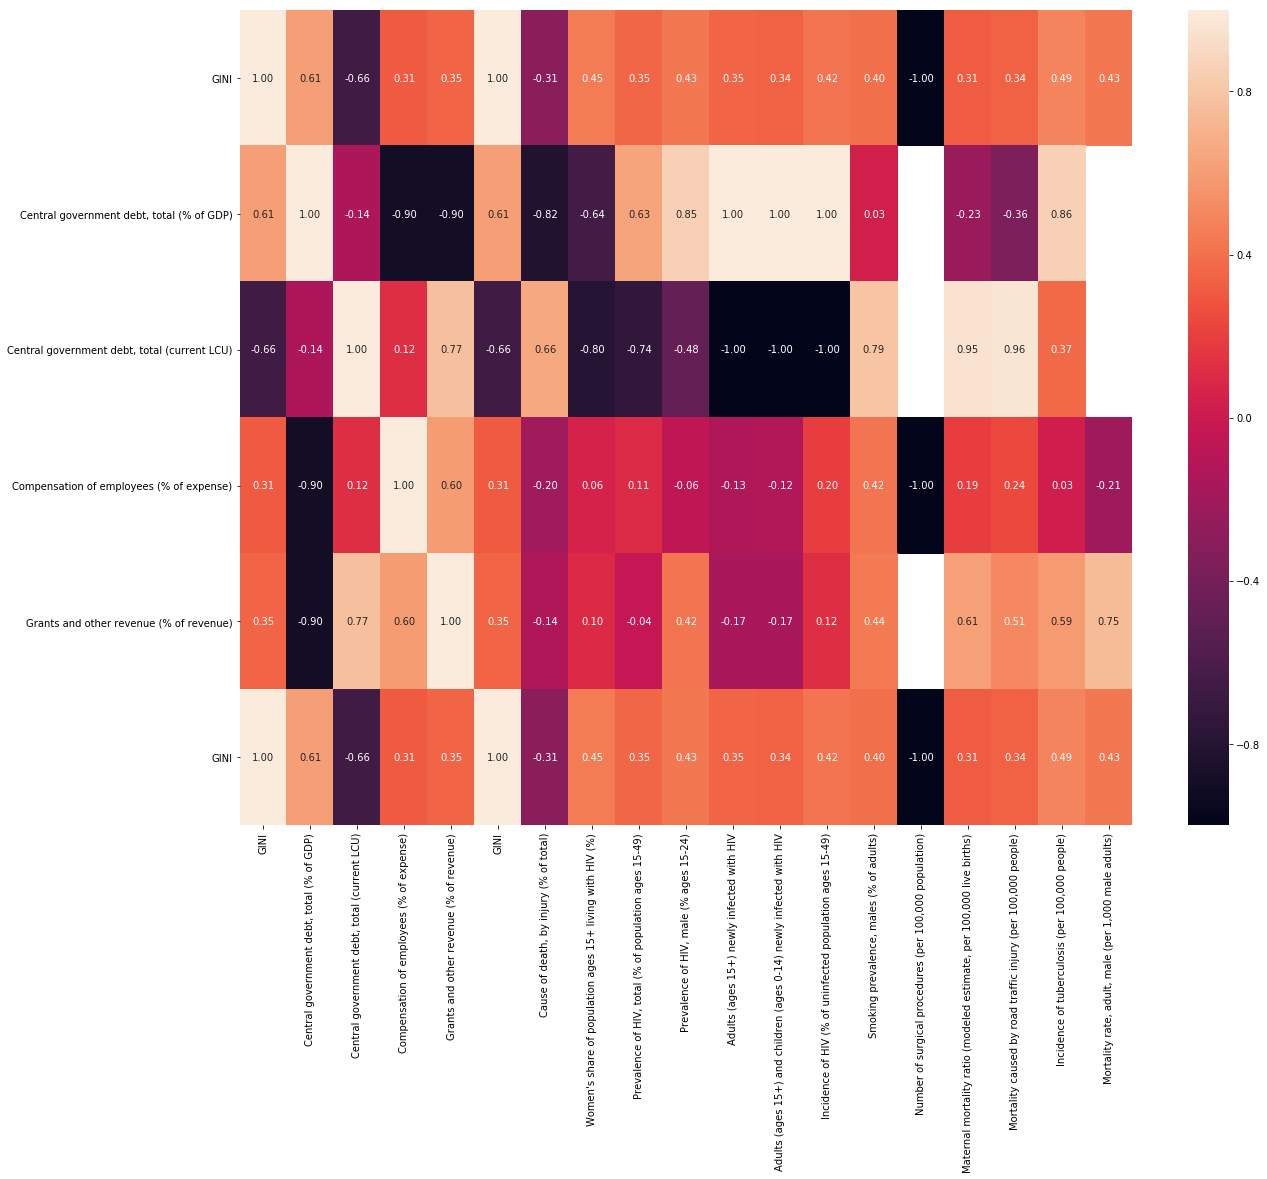

In [23]:
heat_map()

### Further selection of the indicators

With the function below you can select the indicators you would like to further investigate.
You will be asked to input the indicators via an user input. Please note that you do not need to use the quotation marks. 
If you have selected all the indicators you want, type -end-. If you want to select all indicators, type -all indicators-.
    
First you will be asked to selected the health indicators and later on the wealth indicators.<BR>
In this report we selected all the health and wealth indicators.

**Health indicators**

In [24]:
def choosing_health_indicators():
    '''With this funciton you can select the health indicators you want to further investigate'''
    global indicator_list_health
    
    print(Corr_GINI_Selected.index.unique())
    
    indicator_list_health = []
    
    for i in range(len(Corr_GINI_Selected)):
        user_indicator = input("From the list, what indicators would you like to analyse further? ")
        
        if user_indicator == 'end':
            break
        elif user_indicator == 'all indicators':
            indicator_list_health = Corr_GINI_Selected.index.unique()
            break
                                     
        elif( user_indicator in Corr_GINI_Selected.index):
                indicator_list_health.append(user_indicator) 
        else:
            print('Wrong input, try another time')

In [25]:
choosing_health_indicators()

Index(['GINI', 'Incidence of tuberculosis (per 100,000 people)',
       'Women's share of population ages 15+ living with HIV (%)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Prevalence of HIV, male (% ages 15-24)',
       'Incidence of HIV (% of uninfected population ages 15-49)',
       'Smoking prevalence, males (% of adults)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Adults (ages 15+) newly infected with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Mortality caused by road traffic injury (per 100,000 people)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Cause of death, by injury (% of total)',
       'Number of surgical procedures (per 100,000 population)'],
      dtype='object')
From the list, what indicators would you like to analyse further? all indicators


In [26]:
#here you can see which indicators you have selected 
print(indicator_list_health)

Index(['GINI', 'Incidence of tuberculosis (per 100,000 people)',
       'Women's share of population ages 15+ living with HIV (%)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Prevalence of HIV, male (% ages 15-24)',
       'Incidence of HIV (% of uninfected population ages 15-49)',
       'Smoking prevalence, males (% of adults)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Adults (ages 15+) newly infected with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Mortality caused by road traffic injury (per 100,000 people)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Cause of death, by injury (% of total)',
       'Number of surgical procedures (per 100,000 population)'],
      dtype='object')


**Wealth indicators**

In [27]:
def choosing_wealth_indicators():
    '''With this funciton you can select the wealth indicators you want to further investigate'''
    global indicator_list_wealth
    
    print(Corr_GINI_wealth_Selected.index.unique())
    
    indicator_list_wealth = []
    
    for i in range(len(Corr_GINI_wealth_Selected)):
        user_indicator = input("From the list, what indicators would you like to analyse further? ")
        
        if user_indicator == 'end':
            break
        elif user_indicator == 'all indicators':
            indicator_list_wealth = Corr_GINI_wealth_Selected.index.unique()
            break
            
        elif( user_indicator in Corr_GINI_wealth_Selected.index):
                indicator_list_wealth.append(user_indicator) 
        else:
            print('Wrong input, try another time')

In [28]:
choosing_wealth_indicators()

Index(['GINI', 'Central government debt, total (% of GDP)',
       'Grants and other revenue (% of revenue)',
       'Compensation of employees (% of expense)',
       'Central government debt, total (current LCU)'],
      dtype='object')
From the list, what indicators would you like to analyse further? all indicators


In [29]:
# Here you can see which indicators you have selected 
print(indicator_list_wealth)

Index(['GINI', 'Central government debt, total (% of GDP)',
       'Grants and other revenue (% of revenue)',
       'Compensation of employees (% of expense)',
       'Central government debt, total (current LCU)'],
      dtype='object')


### Plotting the indicators 

In this section all indicators will be visualized by using scatterplots. <BR>
The health indicators will be plotted against the GINI rate.
Next, the GINI rate will be plotted against the wealth indicators. For both the health and wealth plots, the results shall be discussed. 
<BR>

**Scatterplots of health indicators**

In [30]:
def regression_plots_health():
    '''This function plots the selected health indicators against the GINI rate '''
    global GINI_Health
    for i in indicator_list_health:
        x='GINI'
        y=i
        sns.regplot(x, y, data = GINI_Health)
        plt.title('Scatterplot')
        plt.show()

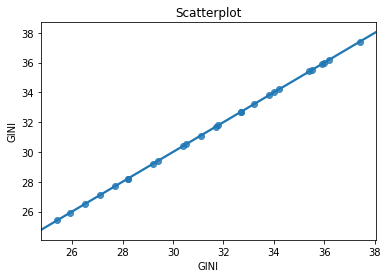

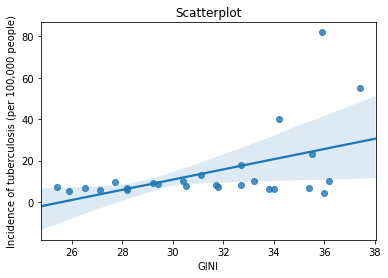

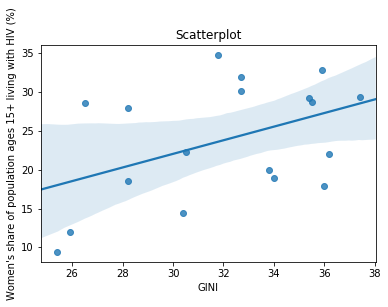

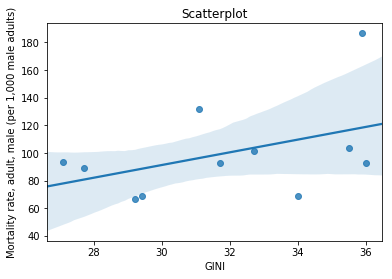

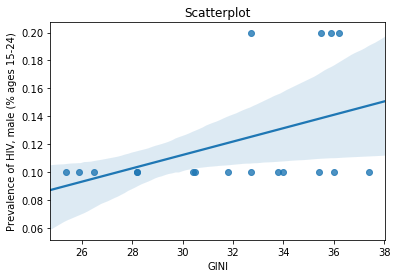

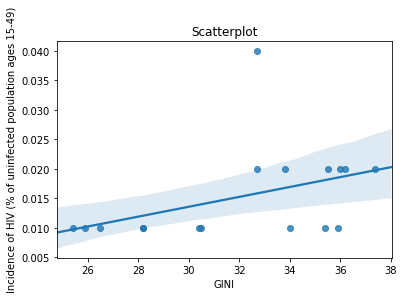

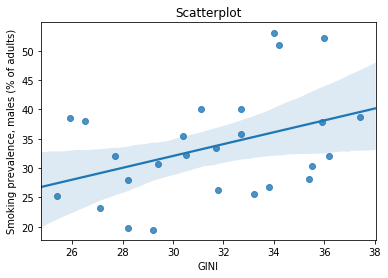

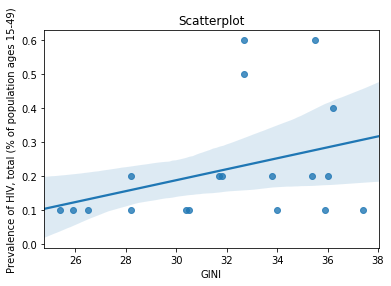

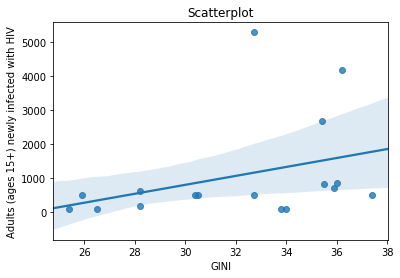

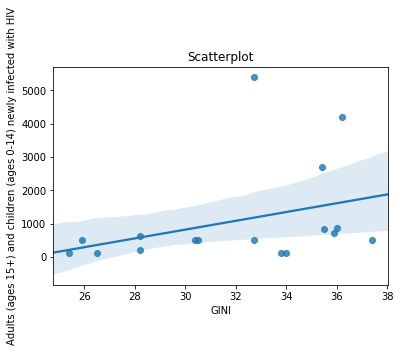

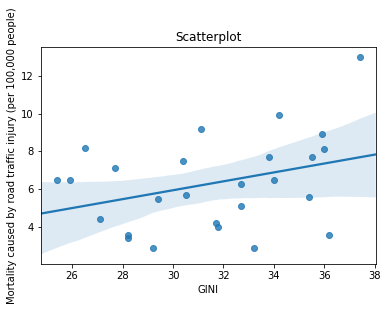

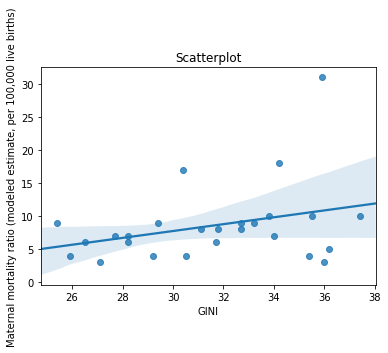

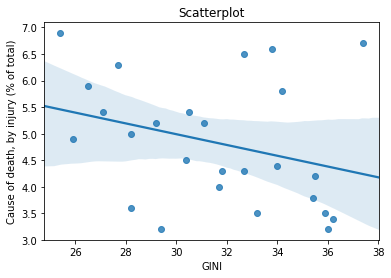

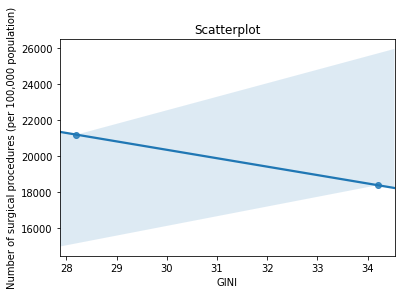

In [31]:
regression_plots_health()

**Results health indicators**

Firstly, some irregularities in the results will be discussed. The first plot, where GINI is plotted against GINI will not be taken into consideration, since this logically gives a perfect correlation. Secondly, when looking at number of surgical procedures, the perfect -1 correlation stood out. When examining the scatterplot, it becomes clear this is due to only having two data points. Therefore, this indicator gives no useful information for this research. <BR>
The indicator which shows the strongest correlation with the GINI rate is "Incidence of tuberculoses". It is a positive correlation of 0.49. This relationship is not suprising. Previous research have found a relationship with the prevalence of tuberculoses and certain characteristics of society. These characteristics include income and income inequality (Holtgrave & Crosby, 2004). Societies with these same characteristics also often show a higher prevalence in people living with HIV (Vandemoortele & Delamonica, 2000). This also explains why all HIV indicators show a positive relation with the GINI factor in these plots. <BR>
Smoking prevalence of males also shows a positive relationship with the GINI factor. As discovered when reviewing the literature on the matter of relationships between income inequality and health, this relationhip can be explained by psycological factors. Income inequality can procude stress, which consequently can lead to certain unhealthy behaviours to reduce this stress. Smoking is a good example of such behaviours (LynchB, et al., 2000).<BR>
In general, as the literature suggested, income inequality can lead to worse health for multiple reasons. Income inequality often goes hand in hand with inequities in access to health services. Considering this, the positive correlation with the mortality rate of males is a logical result.Also the positive correlation with maternal mortality could be explained by this. Moreover, according to the World Health Organization, maternal mortality is higher for women living in rural areas and among poorer communities (World Health Organization, 2018). <BR>
Of course, not all results are backed up by literature, and does not add much to this research. For example, the correlation between mortality caused by road traffic and the GINI rate is not very relavant. There is also a negative correlation between death by injury and the GINI rate, which could be explained by the assumption that the bigger the income inequality is, the more other causes of death occur. However, this is also not backed up by literature, and adds little information to this research. 

**Scatterplots of wealth indicators**

In [32]:
def regression_plots_wealth():
    '''This function plots the GINI rate against the selected wealth indicators'''
    global GINI_wealth
    for i in indicator_list_wealth:
        x=i
        y='GINI'
        sns.regplot(x, y, data = GINI_wealth)
        plt.title('Scatterplot')
        plt.show()

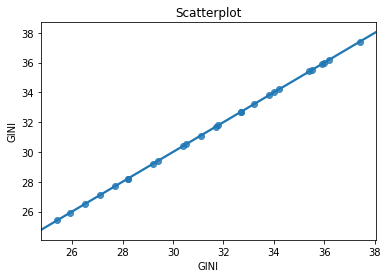

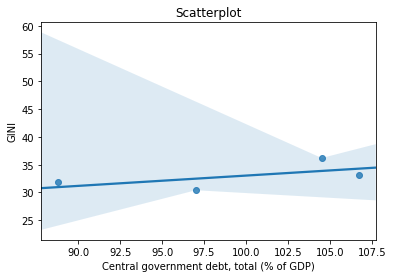

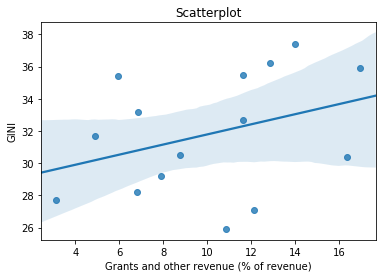

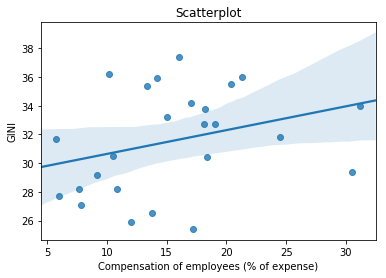

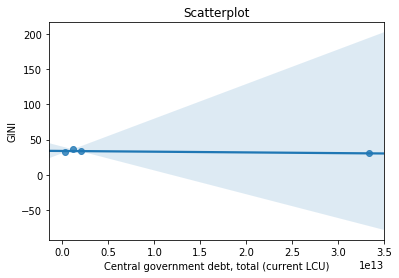

In [33]:
regression_plots_wealth()

**Results of wealth indicators**<BR>
    
The indicator “Central government debt, total (current LCU)” has a high correlation but when you see this plotted on the scatterplot it can be seen that there are only 4 data points. Therefore this may not be particularly useful for our analysis. The uncertainty can be visualized by the 65% confidence interval, which is shaded in blue and can be seen to be very large. The central government debt is also not reliable for the same reason. 

This leaves the indicators “Grants and other revenue (% of revenue)” and “Compensation of employees (%expenses)”. This has many more data points and therefore this data is more reliable. Looking at these results it can be seen that as “Compensation of employees (%expenses)” increases inequality increases, a positive correlation. It can also be seen that for the majority of health indicators that a high Compensation of employees resulted in the poor score for health indicators. This shows that a high Compensation of employees is a symptom of wealth inequality and not a way to solve it. The same can be said about “grants and other revenue (% of revenue)” indicator. 

The definition of “Grants and other revenue (% of revenue)” according to the world bank is:

“Grants and other revenue include grants from other foreign governments, international organizations, and other government units; interest; dividends; rent; requited, nonrepayable receipts for public purposes (such as fines, administrative fees, and entrepreneurial income from government owner­ship of property); and voluntary, unrequited, nonrepayable receipts other than grants” (World Bank, 2018).

From our analysis countries with large levels of wealth inequality score poorly on health indicators. The reason for the positive correlation could be due to a small cohort of the population having the majority of wealth. Therefore, a large part of the population is unable to fund their own healthcare and this gap in funds needed for their health care is met through grants and funds from other foreign governments and international organization. Unfortunately, this data set is not disaggregate further and therefore using this data set alone it is not possible to confirm this.

The world bank defines “Compensations of employees (% of expenses)” as:

“Compensation of employees consists of all payments in cash, as well as in kind (such as food and housing), to employees in return for services rendered, and government contributions to social insurance schemes such as social security and pensions that provide benefits to employees”(World Bank, 2018).

This, therefore, can be seen as a transfer payment. Despite this, it does from our analysis it is not reducing wealth inequality. This could be because the wealth is not been redistributed to the poorest in society. Another reason this may not be reducing wealth inequality is that after the wealth is distributed to the poorest it is then, almost immediately, redistributed back to the richest cohort. This result is surprising it appears that there is an unknown mechanism that results in the poorest cohort effectively been blocked out from wealth or once gaining wealth it almost immediately having it redistributed back to the richest.



## 5. Conclusion and policy recommendations


This report set out to answer the question: **In what way does income inequality affect health in Europe?**

First, it became clear that every country experienced income inequality, although not to a very high degree. Non the less, when looking at the health indicators in relation with the GINI rate, it became clear that income inequality does in fact influence health within a country. Especially the prevalence of tuberculoses and HIV is influenced by income inequality. Literature also suggested that these relationships can often be tied to psychological factors, which explains that income inequality can lead to stress, which consequently leads to unhealthy behaviour such as smoking. Overall, a high GINI rate means citizens tend to be less healthy, which can also explain the higher mortality rate in males, and the higher rate of meternal mortality. 

For the wealth indicators, there was unreliable data as a number of data points were missing. From the chosen indicators the relationship with GINI was generally weak or gave unexpected results. This being that the chosen indicators that met the correlation limit of 0.3 and we’re deemed reliable positively with GINI. 
As for policy recommendations, it has become clear that especially in countries with high income inequality, it is important to make health care accessable. However, even if health care is financially accessable, some behavioural interventions might be needed to get people to actually make use of this. These behavioural inteventions might help people to overcome the psychological implications income inequality has in relation to health care. Such interventions might be stimulating people to go into counseling for mental issues, or making people more comfortable with going to see a doctor. Most importantly, it is key to provide citizens with a save and comfortable health care environment. 

Since there is a complex dynamic to how wealth indicators actually affect income inequality, future research may include to consult with an expert of transfer payments to identify keywords which are used to describe transfer payments. The description of all world bank indicators could then search for these words and selected this way. This would broaden the search area but also increases the selection of appropriate indicators. However, since the results showed low correlation between income inequality and transfer payments, the policy recommendation here is that simply increasing transfer payments is not an effective measure to reduce income inequality. Therefore, this also does not improve population health.

## References 

AVERT. (2017, August 30). HIV prevention programmes overview. Retrieved October 26, 2018, from https://www.avert.org/professionals/hiv-programming/prevention/overview

Holtgrave, D. R., & Crosby, R. A. (2004). Social determinants of tuberculosis case rates in the United States. American journal of preventive medicine, 26(2), 159-162.

Institute for Policy Studies. (2018). Inequality and Health - Inequality.org. Retrieved October 30, 2018, from https://inequality.org/facts/inequality-and-health/

Investopedia Staff. (2018, October 17). Gini Index. Retrieved October 22, 2018, from https://www.investopedia.com/terms/g/gini-index.asp

Lynch, J. (2000)A. Income inequality and health: expanding the debate. Social science & medicine, 51(7), 1001-1005.

Lynch, J. W., Smith, G. D., Kaplan, G. A., & House, J. S. (2000)B. Income inequality and mortality: importance to health of individual income, psychosocial environment, or material conditions. Bmj, 320(7243), 1200-1204.

Pickett, K. E., & Wilkinson, R. G. (2015). Income inequality and health: a causal review. Social science & medicine, 128, 316-326.

Subramanian, S. V., & Kawachi, I. (2004). Income inequality and health: what have we learned so far?. Epidemiologic reviews, 26(1), 78-91.

Tax Policy Center. (2018). Taxes and Income Inequality. Retrieved November 2, 2018, from https://www.taxpolicycenter.org/publications/taxes-and-income-inequality/full

The Economist. (2008, November 20). Health and wealth. Retrieved October 30, 2018, from https://www.economist.com/finance-and-economics/2008/11/20/health-and-wealth

United Nations. (2018). Goal 3 : Sustainable Development Knowledge Platform. Retrieved October 30, 2018, from https://sustainabledevelopment.un.org/sdg3

Vandemoortele, J., & Delamonica, E. (2000). The ‘education vaccine’against HIV. Current issues in comparative education, 3(1), 6-13.

Wilkinson, R. G., & Pickett, K. E. (2006). Income inequality and population health: a review and explanation of the evidence. Social science & medicine, 62(7), 1768-1784.

Wilson, L. T. (2009, May 2). Statistical Correlation. Retrieved October 30, 2018, from https://explorable.com/statistical-correlation

World Bank. (2018, Nov 1). The World Bank | Data. Retrieved from World Bank: https://data.worldbank.org/indicator/GC.REV.GOTR.ZS?view=chart

World Health Organisation. (2018, February 16). Maternal mortality. Retrieved November 1, 2018, from http://www.who.int/news-room/fact-sheets/detail/maternal-mortality

